## 👮경도

##### 경도 팀의 다른 글을 보고싶다면?

[0주차. 딥러닝을 활용한 이미지 생성모델](https://dacon.io/competitions/official/235946/codeshare/5497?page=1&dtype=random)

[1주차. 생성모델이란 무엇인가?](https://dacon.io/competitions/official/235946/codeshare/5499?page=1&dtype=random)

### 3.2 Tensor(Tensorflow)

#### GPU 환경을 사용하실 수 없으신 분들은 google colab을 통해 확인하시면 되겠습니다.
#### 해당 내용은 메인 포스팅의 pytorch 내용을 tensorflow로 구현하였습니다.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

넘파이와 텐서의 연산속도를 비교해보도록 하겠습니다.

넘파이로도 3차원 이상의 데이터를 표현하는것이 가능하지만, 텐서로 연산을 진행하면 훨씬 빠른 속도로 진행이 가능합니다.(GPU를 통한 연산속도 가속이 가능)

In [2]:
size = 1000
a = np.random.rand(size, size) # size * size의 행렬 생성.
b = np.random.rand(size, size)

start = time.time()

x = np.dot(a,b)
print("넘파이 연산 속도:",time.time() - start)

넘파이 연산 속도: 0.031286001205444336


In [6]:
aa = tf.constant(a)
bb = tf.constant(b)

start = time.time()

with tf.device('/cpu:0'):
    cc = tf.matmul(aa,bb)
print("텐서플로 연산 속도(CPU):",time.time() - start)

텐서플로 연산 속도(CPU): 0.013023138046264648


In [7]:
start = time.time()
with tf.device("/device:GPU:0"):
    cc = tf.matmul(aa,bb) 
print("텐서플로 연산 속도(GPU):",time.time() - start)

텐서플로 연산 속도(GPU): 0.0005221366882324219


위의 결과처럼 tensor를 이용하는 pytorch에서의 GPU를 통한 연산속도가 훨씬 빠른것을 볼 수 있었습니다.

#### Tensor의 생성 및 연산

Tensor를 새로 생성할 수도 있지만 기존의 넘파이 배열을 tensor로 변환이 가능하고, 반대로 tensor를 넘파이 배열로 변환또한 가능합니다. 

텐서는 넘파이 배열과 마찬가지로 연산이 가능합니다. 그리고 넘파이 배열과 마찬가지로 난수생성도 가능합니다.

In [8]:
x = np.array([[1,2,3],[4,5,6]], dtype=int) ## numpy array
x_tensor = tf.constant(x)                  ## numpy to tensor
print(x_tensor)
x_numpy = x_tensor.numpy()                 ## tensor to numpy
print(x_numpy)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int64)
[[1 2 3]
 [4 5 6]]


In [9]:
x_tensor = tf.constant(x,dtype=float)
print(x_tensor)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


In [10]:
tf.random.uniform([2,3], 0, 1)  ## 0~1 사이
tf.random.normal([2,3])         ## 표준정규분포 내에서
tf.random.uniform([2,3],0,0)    ## 0만

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

앞서 살펴본 것처럼 tensor 형태로 딥러닝을 수행하게 되면 기존의 연산의 주체가 CPU인데 반해 tensor를 이용하게 되면 GPU를 통한 연산속도의 가속이 가능하게 됩니다. 이를 선택하여 수행도 가능합니다. 방법은 아래와 같습니다.

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())  ## device 확인

In [ ]:
with tf.device("/device:CPU:0") ## CPU 할당
with tf.device("/device:GPU:0") ## GPU 할당

### Tensor 연산

Tensor의 연산을 해봅시다. 기본적인 방법은 numpy와 동일합니다.

In [11]:
x = tf.constant([[1,2,3],[4,5,6]], dtype = float)
y = tf.constant([[-1,-2,-3],[-4,-5,-6]], dtype = float)

In [12]:
tf.add(x,y)      ## x+y
tf.multiply(x,y) ## x*y
tf.divide(x,y)   ## x/y
tf.pow(x,2)      ## x**2

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.      ,  4.      ,  9.      ],
       [16.      , 24.999998, 36.      ]], dtype=float32)>

In [13]:
tf.transpose(y) ## transpose
tf.matmul(x,tf.transpose(y)) ## 행렬곱
tf.math.log(x)    ## log(x)
tf.math.exp(x)    ## exp(x)

2022-07-19 13:42:47.068185: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[  2.7182817,   7.389056 ,  20.085537 ],
       [ 54.59815  , 148.41316  , 403.4288   ]], dtype=float32)>

이처럼 넘파이 배열과 같이 연산을 진행할 수 있습니다.

### Tensor 변환

Tensor는 형 변환이 자유롭습니다. 즉, 새로운 차원을 추가하거나 기존의 차원을 축소하는등의 형변환이 자유롭습니다.

이외에도 각각의 텐서를 결합하거나 두개로 분리하는것 또한 가능합니다. 

In [14]:
x1 = tf.random.uniform([1,32,32], 0, 1)  ## 0~1 사이
x2 = tf.squeeze(x)
x1.shape,x2.shape

(TensorShape([1, 32, 32]), TensorShape([2, 3]))

In [15]:
x1 = tf.random.uniform([32,32], 0, 1)
x2 = tf.expand_dims(x1, axis=0)
print(x1.shape,x2.shape) # torch.Size([32, 32]) torch.Size([1, 32, 32])
x3 = tf.expand_dims(x1, axis=1)
print(x1.shape,x3.shape) # torch.Size([32, 32]) torch.Size([32, 1, 32])

(32, 32) (1, 32, 32)
(32, 32) (32, 1, 32)


In [16]:
x = tf.constant([[1,2,3],[4,5,6]], dtype = float)
y = tf.constant([[-1,-2,-3],[-4,-5,-6]], dtype = float)
xy1 = tf.concat([x,y], axis = 0)  # 0번째에 결합
xy2 = tf.concat([x,y], axis = 1)  # 1번째에 결합
print(x.shape, y.shape, xy1.shape, xy2.shape)

(2, 3) (2, 3) (4, 3) (2, 6)


In [17]:
x1,y1 = tf.split(xy1, num_or_size_splits=2, axis=0)
x1, y1

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 2., 3.],
        [4., 5., 6.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[-1., -2., -3.],
        [-4., -5., -6.]], dtype=float32)>)

In [18]:
x2,y2 = tf.split(xy1, num_or_size_splits=[2,1], axis=1)
x2, y2

(<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
 array([[ 1.,  2.],
        [ 4.,  5.],
        [-1., -2.],
        [-4., -5.]], dtype=float32)>,
 <tf.Tensor: shape=(4, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [-3.],
        [-6.]], dtype=float32)>)

### Tensorflow 이미지 불러오기

마지막으로 Tensorflow 모델 학습을 위한 이미지 데이터를 불러오는 과정에 대해 학습하겠습니다.

이번에 이용할 데이터셋은 구글에서 제공하는 5종의 꽆 이미지가 담긴 데이터셋입니다. 이를 모델에 학습이 가능한 데이터셋으로 전처리 하는 과정을 진행하는 방법을 알아보도록 하겠습니다.

In [22]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True,
                                   )
data_dir = pathlib.Path(data_dir)

data_dir에는 이미지들이 저장된 경로가 지정되어 있습니다.

다음 과정을 통해 이미지의 사이즈와, batch size를 정해주어 전처리를 해보겠습니다.

In [20]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=16)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=16)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


각각의 데이터를 훈련과 검증용으로 분류해 변수에 담아줍니다. 이를 데이터로더를 이용해 원하는 batch크기만큼 적재합니다.

데이터로더를 활용해 각각의 이미지데이터를 불러올때 batch_size에서 정의한 만큼 불러올 수 있습니다. 

한개의 batch_size를 불러와 시각화를 해보도록 하겠습니다.

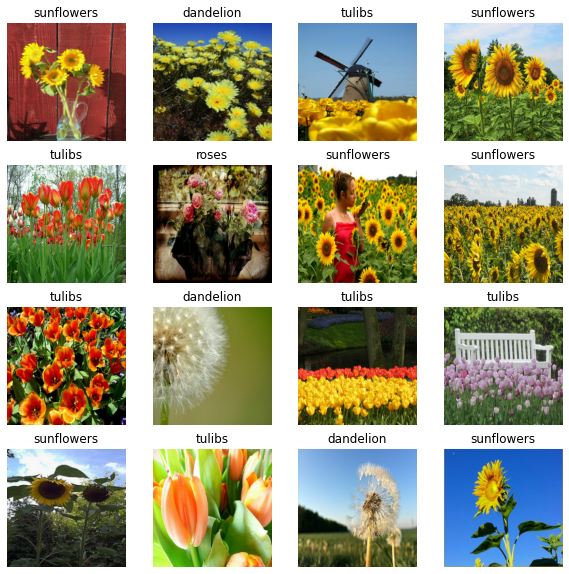

In [21]:
class_names = ['daisy','dandelion','roses','sunflowers','tulibs']
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

---

### Reference
- Tensorflow Tutorial: https://www.tensorflow.org/tutorials?hl=ko
